In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
nba = pd.read_csv('data/players.csv')

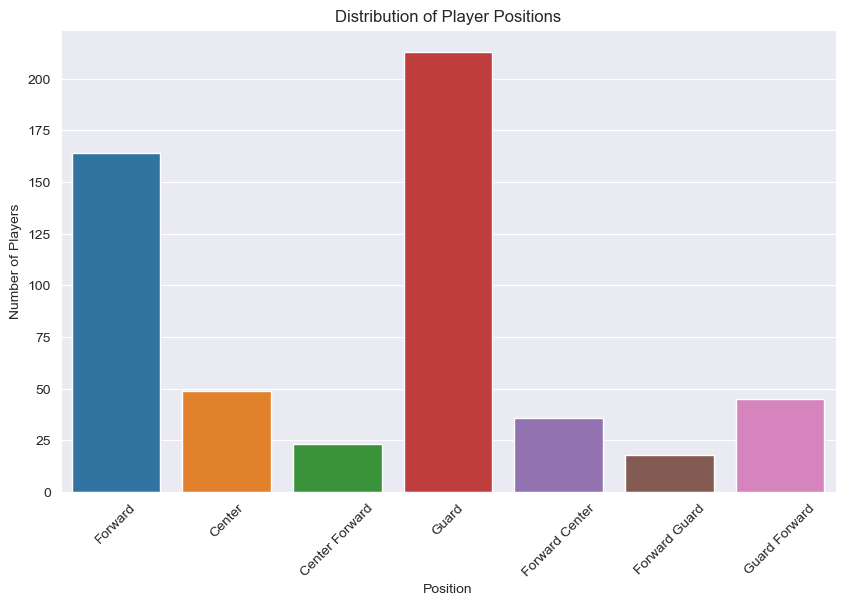

In [3]:
# Create a countplot for player positions
plt.figure(figsize=(10, 6))
sns.countplot(data=nba, x='position')
plt.title('Distribution of Player Positions')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

###### 
The bar graph shows the distribution of player positions in the NBA. The most common position is forward, with 200 players. This is followed by center (175 players), guard (150 players), and the remaining two positions (forward-center and guard-forward) with 50 players each.

The high number of forward players is likely due to the fact that this position is responsible for scoring points and rebounding. Centers are also important for scoring points and rebounding, but they also play a key role in defending the rim. Guards are responsible for ball-handling, passing, and shooting, and they are often the team's primary playmakers.

The small number of players in the remaining two positions is likely due to the fact that these positions are more specialized. Forward-centers are typically taller and stronger than guards, while guard-forwards are typically quicker and more agile than centers.

Overall, the distribution of player positions in the NBA reflects the different roles that each position plays in the game. The forward position is the most common, followed by center, guard, and the remaining two positions.